# K-Means Clustering

(in progress)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_samples, silhouette_score

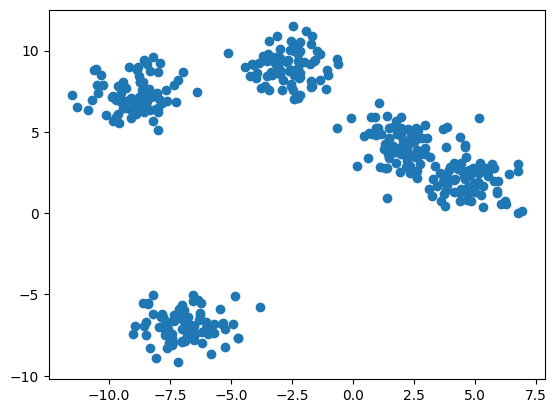

In [2]:
X = make_blobs(n_samples = 400, n_features = 2, centers = 5, cluster_std = 1, random_state=42)
X = X[0]
plt.scatter(X[:,0],X[:,1])
plt.show()

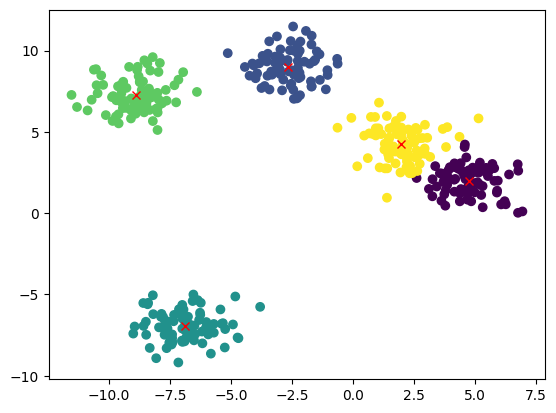

In [3]:
km = KMeans(n_clusters = 5)
km.fit(X)

labels = km.labels_
centroids = km.cluster_centers_

plt.scatter(X[:,0], X[:,1], c = labels)
plt.plot(centroids[:,0], centroids[:,1], 'rx')
plt.show()



In [4]:
sil_score = silhouette_score(X, labels)
sil_samples = silhouette_samples(X,labels)

(384, 512, 3)


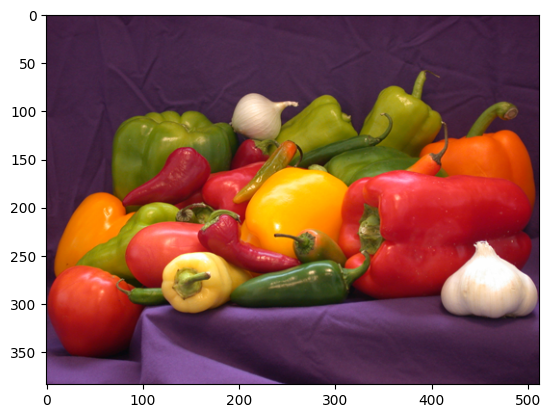

In [5]:
import requests
from PIL import Image
from io import BytesIO

from matplotlib.colors import ListedColormap

url = "https://raw.githubusercontent.com/YugeTen/Computer-vision-CLAB2/master/peppers.png"

response = requests.get(url)
peppers_image = Image.open(BytesIO(response.content))
peppers = np.array(peppers_image)

print(peppers.shape)
h, w = peppers.shape[:2]

plt.imshow(peppers)

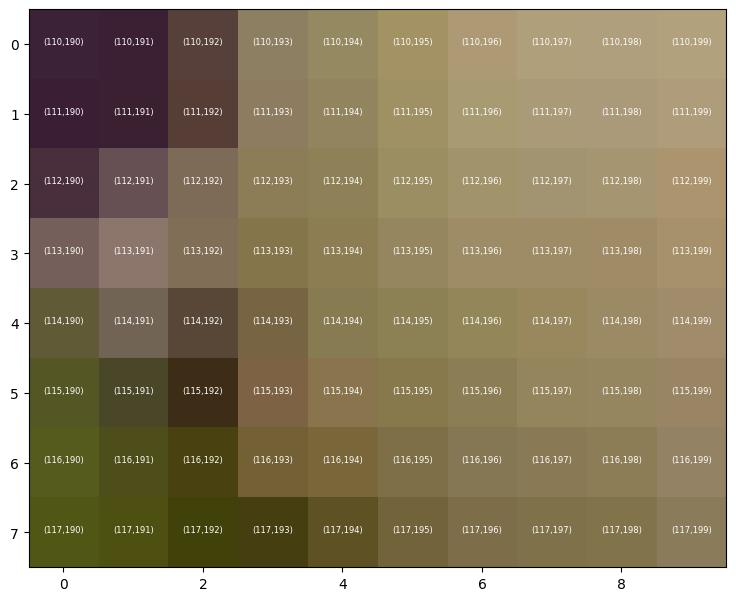

In [6]:
x_coords, y_coords = np.meshgrid(range(w), range(h))

x_min, x_max = 190, 200
y_min, y_max = 110, 118

fig, ax = plt.subplots(1,1, figsize = (9,9))
plt.imshow(peppers[y_min:y_max, x_min:x_max,:])

for m, y in enumerate(range(y_min, y_max)):
    for n, x in enumerate(range(x_min, x_max)):
        plt.text(n, m, f'({y},{x})', 
                 fontsize = 6, color ='white', ha = 'center')
plt.show()

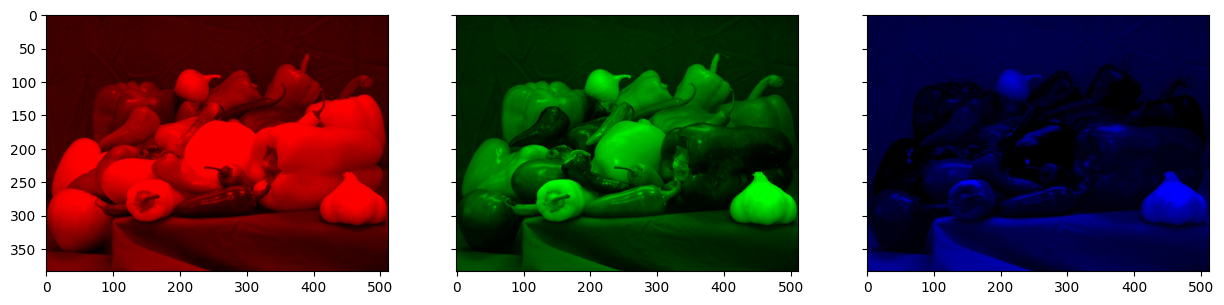

In [7]:
fig, ax = plt.subplots(1, 3, figsize = (15,5),sharey=True)

zeros = np.zeros(256)
ones = np.ones(256)
color_range = np.linspace(0,1, 256, endpoint=True)

reds =ListedColormap(np.vstack([color_range, zeros, zeros]).transpose())
greens =ListedColormap(np.vstack([zeros, color_range, zeros]).transpose())
blues =ListedColormap(np.vstack([zeros, zeros, color_range]).transpose())

RGB = [reds,greens,blues]

for n in range(3):
    ax[n].imshow(peppers[:,:,n], cmap = RGB[n])
    
plt.show()


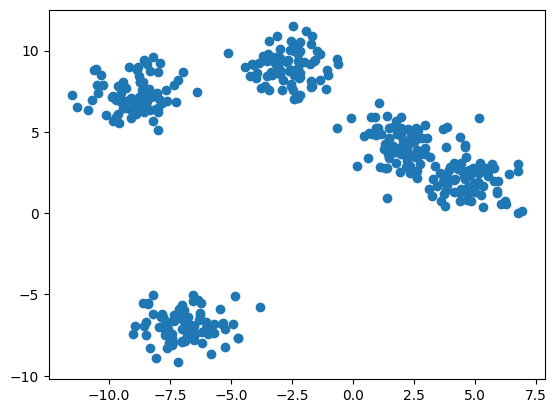

In [8]:
X = make_blobs(n_samples = 400, n_features = 2, centers = 5, cluster_std = 1, random_state=42)
X = X[0]
plt.scatter(X[:,0],X[:,1])
plt.show()

In [9]:
peppers_dict = dict(
    R = peppers[:,:,0].flatten(),
    G = peppers[:,:,1].flatten(),
    B = peppers[:,:,2].flatten(),
    x = x_coords.flatten(),
    y = y_coords.flatten()   
)


peppers_dict
peppers_df = pd.DataFrame(peppers_dict)
peppers_df['RGB'] = peppers_df.apply(lambda row: [row['R']/255, row['G']/255, row['B']/255], axis=1)
peppers_df.head()

,R,G,B,x,y,RGB
0,62,29,64,0,0,"[0.24313725490196078, 0.11372549019607843, 0.2..."
1,63,31,64,1,0,"[0.24705882352941178, 0.12156862745098039, 0.2..."
2,63,34,64,2,0,"[0.24705882352941178, 0.13333333333333333, 0.2..."
3,65,30,60,3,0,"[0.2549019607843137, 0.11764705882352941, 0.23..."
4,66,27,59,4,0,"[0.25882352941176473, 0.10588235294117647, 0.2..."


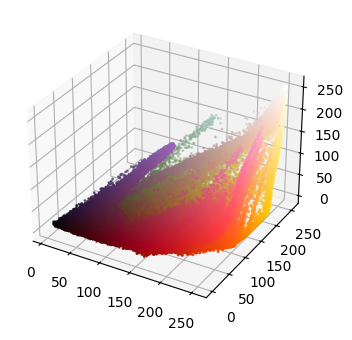

In [10]:
fig, ax = plt.subplots(1,1,figsize = (4,4), subplot_kw = {'projection':'3d'})

ax.scatter(peppers_df['R'], peppers_df['G'], peppers_df['B'], c = peppers_df['RGB'],
           s = 1)
plt.show()

In [11]:
X = peppers_df[['R','G','B']]
km = KMeans(n_clusters = 3)

km.fit(X)

labels = km.labels_
centroids = km.cluster_centers_






In [12]:

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

NameError: name 'lfw_people' is not defined